# Introduction to Data
#####    Practical assignment 1


This practical assignment need to be handed in on Brightspace before the deadline, 23:30 17/04/2020. Make sure that every cell is executed/compiled and renamed to 

**Assignment1_Surname1_Surname2.ipynb**

before submitting. For questions contact your TA during the workgroup, or via mail. You will get either a pass or fail for this assignment, depending on whether all questions are sufficiently answered (i.e. if enough effort has been put into this assignment)



**Name 1:** Erik Frohn - s1034685

**Name 2:** Evie de Leeuw - s1037585

### Dataset

The aim of this assignment is to learn how to apply the theoretical knowledge you gained in the book and the video clips to real datasets. Today, you will learn how to load data, how datasets are organized, how you can summarize data and how you can plot data. To help us with this we will use the dataset `BikeRental.csv` (modified from original source).

Bikes can be rented and returned at specific points in the city, and the number of bikes that are rented on a day depends on a number of factors. Some potential factors are given in this dataset, which we will visualize in some plots. First we need to import some libraries.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

For importing data we will use the <span style="color:red">Pandas</span> library, which has a lot of tools that are useful for data analysis. When reading in data, Pandas will create a <span style="color:red">DataFrame</span>. A Pandas DataFrame is similar to a python dictionairy, in the sense that each column name is a key, and the data below it are the values. The columns in the DataFrame represent the different variables and the rows represent the different cases (observations). We can see all the variables in the DataFrame by printing all the `key` values, or printing the `head/tail` of the file. One key with all its values is called a Series, this is one column in the DataFrame.

In [0]:
raw_data = pd.read_csv("BikeRental.csv")
raw_data.keys()


Index(['date', 'season', 'year', 'month', 'weekday', 'hour', 'workingday',
       'weathersit', 'temperature', 'feeling temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [0]:
raw_data.head()

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0,1


In [0]:
raw_data.tail()

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
17374,31-12-12,1,1,12,1,19,1,2,10.66,12.880,60,11.0014,119
17375,31-12-12,1,1,12,1,20,1,2,10.66,12.880,60,11.0014,89
17376,31-12-12,1,1,12,1,21,1,1,10.66,12.880,60,11.0014,90
17377,31-12-12,1,1,12,1,22,1,1,10.66,13.635,56,8.9981,61
17378,31-12-12,1,1,12,1,23,1,1,10.66,13.635,65,8.9981,49


In this file we have the following variables:

- Date
- Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
- Year (0: 2011, 1: 2012)
- Month (1 to 12)
- Weekday (0 to 6)
- Hour (0 to 23)
- Workingday (0: Weekend or Holiday, 1: Otherwise)
- Weather (1: Clear, 2: Cloudy, 3: Light rain, 4: Heavy rain)
- Temperature (Celsius)
- Feeling temperature (Celsius)
- Humidity (percentage)
- Windspeed (km/h)
- Count (number of rented bikes)

### <span style="color:red"> Question 1 </span>
For each variable, write down what kind of data it is (Categorical, Ordinal, Discrete, Continuous)

(Double click on this cell to edit its contents, and run it when you are done editing)

- Date = Categorical
- Season = Categorial
- Year = Categorical
- Month = Categorical
- Weekday = Categorical
- Hour = Categorical
- Workingday = Categorical
- Weather = Ordinal
- Temperature = Continuous
- Feeling temperature = Continuous
- Humidity = Continuous
- Windspeed = Continuous
- Count = Discrete

A good first step in any analysis is to distill the information in all the cases to a few summary statistics and graphics. As a simple example, the function describe returns a numerical summary: count, mean, standard deviation, minimum, first quartile, median, second quartile, and maximum. 
Python also has built-in functions to compute summary statistics one by one, such as the functions mean or max. 

In [0]:
raw_data['temperature'].describe()

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temperature, dtype: float64

In [0]:
 print(raw_data['temperature'].mean())

20.3764739052879


### <span style="color:red"> Question 2 </span>
Calculate the IQR of the feeling temperature and of the windspeed (and print both of them)

In [0]:
print(raw_data['temperature'].describe()['75%']-raw_data['temperature'].describe()['25%'])
print(raw_data['windspeed'].describe()['75%']-raw_data['windspeed'].describe()['25%'])

13.12
9.996400000000001


For categorical data, it makes more sense to look at the sample frequency or relative frequency distribution. The function value_counts does this for you by counting the number of times each kind of response was given. For example, to see the number of cases that were recorded in the different seasons we can type:

In [0]:
raw_data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

### Subsets of the dataset

To answer specific questions about the data, it is important that we can zoom in on different parts of the data. For example, we want to look at all the non-working days where the temperature was higher than 10°C, we can do that as follows:

In [0]:
#With multiple conditions the brackets around each condition are necessary!
no_work_temp_over_10 = raw_data[(raw_data['workingday'] == 0) & (raw_data['temperature'] > 10)]

print("Number of items in subset:    ", no_work_temp_over_10.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
no_work_temp_over_10.head()

Number of items in subset:     4787
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
9,01-01-11,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14
10,01-01-11,1,0,1,6,10,0,1,15.58,19.695,76,16.9979,36
11,01-01-11,1,0,1,6,11,0,1,14.76,16.665,81,19.0012,56
12,01-01-11,1,0,1,6,12,0,1,17.22,21.210,77,19.0012,84
13,01-01-11,1,0,1,6,13,0,2,18.86,22.725,72,19.9995,94


Or if we are simply interested in the distribution of weather over each weekday, we can simply use the `groupby` command

In [0]:
raw_data.groupby('weekday')['weathersit'].value_counts().unstack()

weathersit,1,2,3,4
weekday,,,,
0,1765.0,568.0,169.0,NaN
1,1582.0,726.0,170.0,1.0
2,1522.0,694.0,237.0,NaN
3,1568.0,613.0,293.0,1.0
4,1656.0,636.0,179.0,NaN
5,1645.0,659.0,183.0,NaN
6,1675.0,648.0,188.0,1.0


We can also look at specific cases in our data by indexing our DataFrame. For example, if we want all of the data for the first 10 respondents, we can use the `iloc` function of the dataframe.

In [0]:
raw_data.iloc[0:10,:]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0000,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0000,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0000,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0000,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0000,1
5,01-01-11,1,0,1,6,5,0,2,9.84,12.880,75,6.0032,1
6,01-01-11,1,0,1,6,6,0,1,9.02,13.635,80,0.0000,2
7,01-01-11,1,0,1,6,7,0,1,8.20,12.880,86,0.0000,3
8,01-01-11,1,0,1,6,8,0,1,9.84,14.395,75,0.0000,8
9,01-01-11,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14


Similarly, we can look at the season of each observation by typing:

In [0]:
#Here we want to print one column, the season column, so we could also say raw_data.iloc[:,1],
#but since we want it printed in a nice table, we can refer to the first column with 
#raw_data.iloc[:,1:2].

raw_data.iloc[:,1:2]

,season
0,1
1,1
2,1
3,1
4,1
...,...
17374,1
17375,1
17376,1
17377,1


Or just type the column name of the one that you want to print.

In [0]:
raw_data['season']

0        1
1        1
2        1
3        1
4        1
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: int64

### <span style="color:red"> Question 3.1 </span>
Create subsets of the following requirements (and give them fitting names), and print their head:

- Season of Spring and Summer, only from Monday to Wednesday
- Workingday from 08:00 to 20:00, or a non workingday
- Light rainy holidays
- Monday to Friday, with holidays, that had more than 20 bikes rented
- The last 10 cases in the dataset


In [0]:
spr_sum_mon_wed = raw_data[(((raw_data['season'] == 2) | (raw_data['season'] == 3)) & (raw_data['weekday'] < 3))]
print("Number of items in subset:    ", spr_sum_mon_wed.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
spr_sum_mon_wed.head()

Number of items in subset:     3778
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
1807,21-03-11,2,0,3,1,0,1,3,13.94,15.15,66,26.0027,13
1808,21-03-11,2,0,3,1,1,1,2,13.94,15.15,71,26.0027,7
1809,21-03-11,2,0,3,1,2,1,2,13.94,15.15,71,22.0028,6
1810,21-03-11,2,0,3,1,3,1,2,13.94,15.15,71,22.0028,1
1811,21-03-11,2,0,3,1,5,1,1,13.12,15.15,81,19.9995,2


In [0]:
eight_to_eight_and_non_work = raw_data[(raw_data['workingday'] == 0) | ((raw_data['hour'] > 8) & (raw_data['hour'] < 20))]
print("Number of items in subset:    ", eight_to_eight_and_non_work.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
eight_to_eight_and_non_work.head()

Number of items in subset:     10987
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01-01-11,1,0,1,6,0,0,1,9.84,14.395,81,0.0,16
1,01-01-11,1,0,1,6,1,0,1,9.02,13.635,80,0.0,40
2,01-01-11,1,0,1,6,2,0,1,9.02,13.635,80,0.0,32
3,01-01-11,1,0,1,6,3,0,1,9.84,14.395,75,0.0,13
4,01-01-11,1,0,1,6,4,0,1,9.84,14.395,75,0.0,1


In [0]:
light_rain_holidays = raw_data[((raw_data['workingday'] == 0) & (raw_data['weekday'] < 5) & (raw_data['weathersit'] == 3))]
print("Number of items in subset:    ", light_rain_holidays.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
light_rain_holidays.head()

Number of items in subset:     191
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
29,02-01-11,1,0,1,0,6,0,3,17.22,21.210,77,19.9995,2
31,02-01-11,1,0,1,0,8,0,3,16.40,20.455,71,15.0013,8
37,02-01-11,1,0,1,0,14,0,3,14.76,17.425,76,12.9980,59
38,02-01-11,1,0,1,0,15,0,3,13.94,16.665,81,11.0014,74
39,02-01-11,1,0,1,0,16,0,3,13.94,16.665,71,11.0014,76


In [0]:
mon_fri_hol_twentyplus = raw_data[(( (raw_data['weekday'] < 5)) & (raw_data['count'] > 20))]
print("Number of items in subset:    ", mon_fri_hol_twentyplus.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
mon_fri_hol_twentyplus.head()

Number of items in subset:     10157
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
33,02-01-11,1,0,1,0,10,0,2,14.76,17.425,81,15.0013,53
34,02-01-11,1,0,1,0,11,0,2,14.76,16.665,71,16.9979,70
35,02-01-11,1,0,1,0,12,0,2,14.76,16.665,66,19.9995,93
36,02-01-11,1,0,1,0,13,0,2,14.76,17.425,66,8.9981,75
37,02-01-11,1,0,1,0,14,0,3,14.76,17.425,76,12.9980,59


In [0]:
raw_data.iloc[raw_data.shape[0]-10:raw_data.shape[0],:]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
17369,31-12-12,1,1,12,1,14,1,2,11.48,13.635,45,15.0013,247
17370,31-12-12,1,1,12,1,15,1,2,11.48,14.395,45,8.9981,315
17371,31-12-12,1,1,12,1,16,1,2,10.66,12.880,48,12.9980,214
17372,31-12-12,1,1,12,1,17,1,2,10.66,14.395,48,6.0032,164
17373,31-12-12,1,1,12,1,18,1,2,10.66,13.635,48,8.9981,122
17374,31-12-12,1,1,12,1,19,1,2,10.66,12.880,60,11.0014,119
17375,31-12-12,1,1,12,1,20,1,2,10.66,12.880,60,11.0014,89
17376,31-12-12,1,1,12,1,21,1,1,10.66,12.880,60,11.0014,90
17377,31-12-12,1,1,12,1,22,1,1,10.66,13.635,56,8.9981,61
17378,31-12-12,1,1,12,1,23,1,1,10.66,13.635,65,8.9981,49


### <span style="color:red"> Question 3.2 </span>
Create groups of the following criteria, and print their table:

- Season and workingdays
- Month and temperature in 10 sections (hint, use the pandas function `pd.cut()` to create bins of continuous data)

In [0]:
raw_data.groupby('season')['workingday'].value_counts().unstack()

workingday,0,1
season,,
1,1448,2794
2,1343,3066
3,1355,3141
4,1368,2864


In [0]:
raw_data.groupby(pd.cut(raw_data['temperature'], bins=10))['month'].value_counts().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
temperature,,,,,,,,,,,,
"(0.78, 4.838]",86.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4.838, 8.856]",558.0,209.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,101.0
"(8.856, 12.874]",478.0,503.0,348.0,74.0,NaN,NaN,NaN,NaN,NaN,75.0,381.0,585.0
"(12.874, 16.892]",199.0,399.0,436.0,406.0,34.0,NaN,NaN,NaN,6.0,261.0,615.0,557.0
"(16.892, 20.91]",97.0,148.0,348.0,452.0,231.0,29.0,NaN,NaN,137.0,464.0,310.0,217.0
"(20.91, 24.928]",11.0,44.0,192.0,320.0,578.0,273.0,43.0,91.0,504.0,491.0,114.0,23.0
"(24.928, 28.946]",NaN,7.0,66.0,153.0,454.0,590.0,435.0,695.0,599.0,145.0,6.0,NaN
"(28.946, 32.964]",NaN,NaN,9.0,32.0,163.0,398.0,618.0,559.0,182.0,15.0,NaN,NaN
"(32.964, 36.982]",NaN,NaN,NaN,NaN,28.0,133.0,326.0,129.0,9.0,NaN,NaN,NaN


### Plotting your data

Plotting your data (correctly) is very important. There are many possible plots you could use and some are better than others for a given dataset or data type. To create nice plots, we will be using the `Seaborn` library, which is based on Matplotlib. In the first cell where we import libraries we already included this library with `import seaborn as sns`. Below are some examples

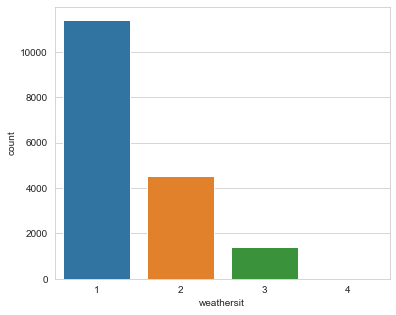

In [0]:
plt.figure(figsize=(6,5))
sns.countplot(raw_data['weathersit'])
plt.show()

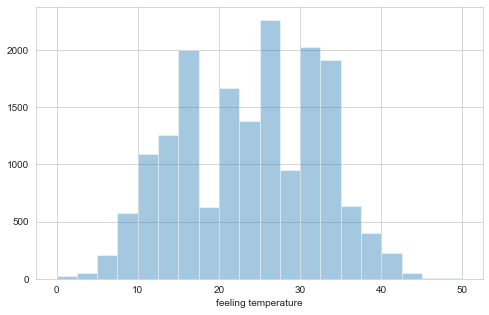

In [0]:
plt.figure(figsize=(8,5))
sns.distplot(raw_data['feeling temperature'], kde=False, rug=False, bins = 20)
plt.show()

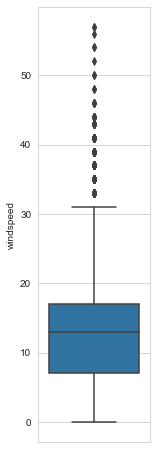

In [0]:
plt.figure(figsize=(2,8))
sns.boxplot(y = raw_data['windspeed'])
plt.show()

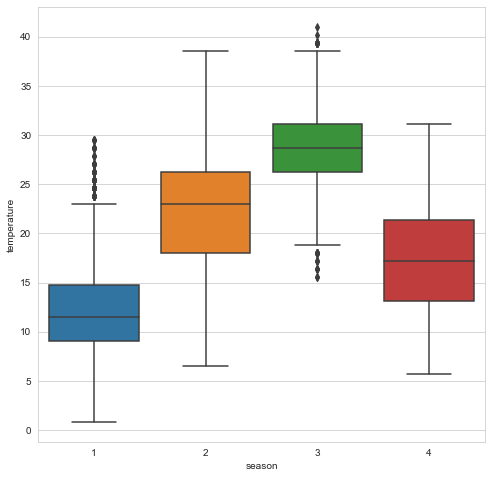

In [0]:
plt.figure(figsize=(8,8))
sns.boxplot(x = raw_data['season'], y = raw_data['temperature'])
plt.show()

### <span style="color:red"> Question 4 </span>

Now it is time for you to create some plots! Use the Seaborn documentation to see the different kind of plots you can use, as well as more options. Answer the following questions, and motivate your answers with plots.

- What do you think is more strongly associated with the number of rented bikes, the weather situation or the feeling temperature being higher than 35?
- When do the most bikes get rented, before the afternoon (0:00 to 12:00) or in the afternoon/evening (12:00 to 23:59).
- Proportionally speaking, how many bikes get rented more on non-working days vs working days?
- Which month has most bikes rentals? Can you figure out which variable(s) are most strongly associated with this?


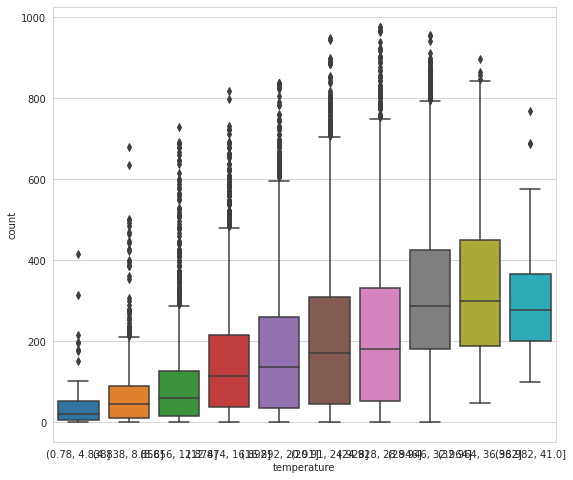

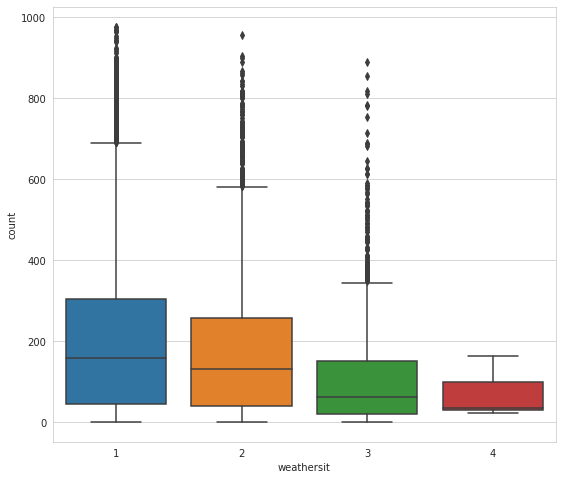

In [0]:
#The weather situation is more clearly associated with the no of bikes rented, as the highest feeling tempoerature will result in a drop of no of rentals.
plt.figure(figsize=(9,8))
sns.boxplot(x =pd.cut(raw_data['temperature'], bins=10), y = raw_data['count'])
plt.show()
plt.figure(figsize=(9,8))
sns.boxplot(x = raw_data['weathersit'], y = raw_data['count'])
plt.show()

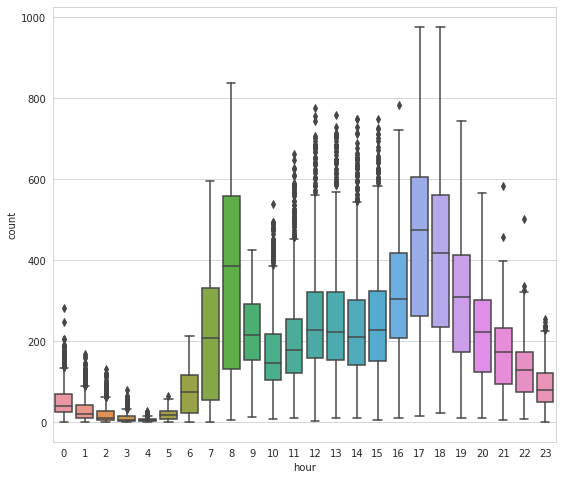

In [0]:
#Obviously there are more sales from 12 to 24 than from 0 to 12.
plt.figure(figsize=(9,8))
sns.boxplot(x = raw_data['hour'], y = raw_data['count'])
plt.show()

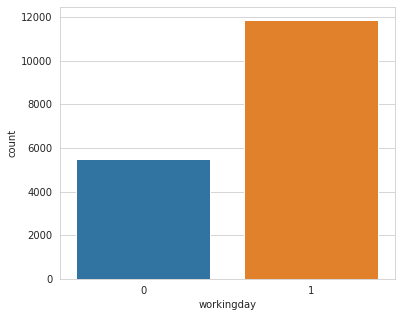

In [0]:
#Because there are way more non-working days than working days, you know that there is a lot more bike rental during the non working days. Proportionally speaking, there are 5 working days for every 2 non-working days, while the plot shows that there are only 2 bikes rented on workdays for every bike rented on non-workdays.
plt.figure(figsize=(6,5))
sns.countplot(raw_data['workingday'])
plt.show()

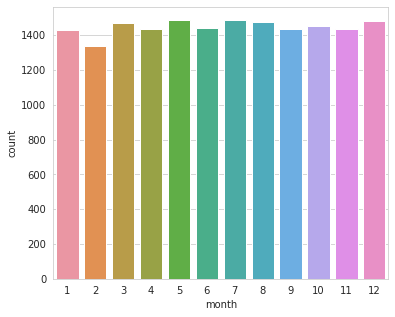

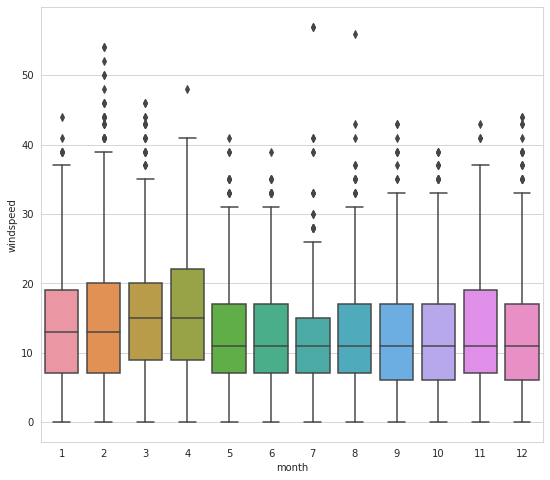

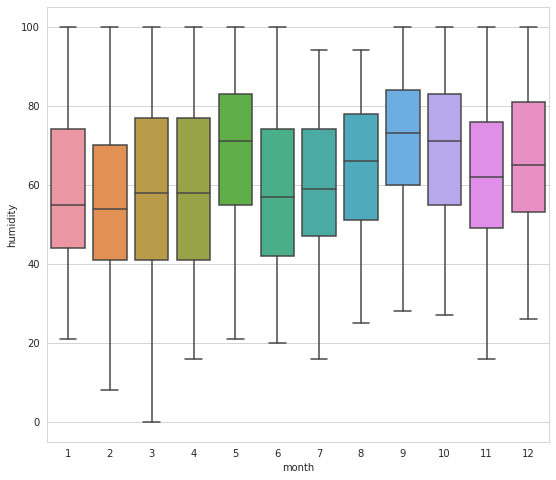

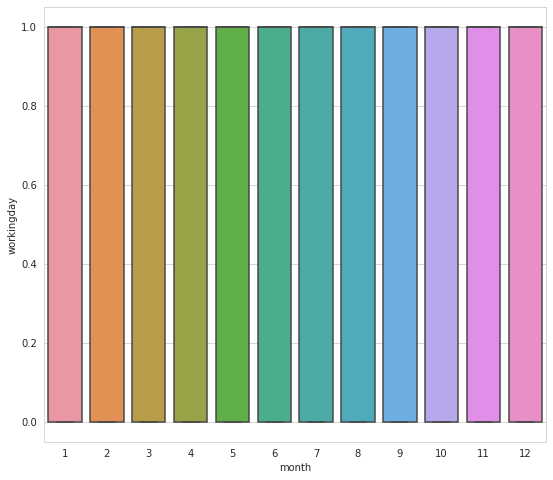

In [0]:
plt.figure(figsize=(6,5))
sns.countplot(raw_data['month'])
plt.show()
#plt.figure(figsize=(9,8))
#sns.boxplot(x = raw_data['month'], y = raw_data['season'])
#plt.show()
#         inconclusive
#plt.figure(figsize=(9,8))
#sns.boxplot(x = raw_data['month'], y = raw_data['weathersit'])
#plt.show()
#         inconclusive
plt.figure(figsize=(9,8))
sns.boxplot(x = raw_data['month'], y = raw_data['windspeed'])
plt.show()
#         shows something
plt.figure(figsize=(9,8))
sns.boxplot(x = raw_data['month'], y = raw_data['humidity'])
plt.show()
#         shows correlation
#plt.figure(figsize=(9,8))
#sns.boxplot(x = raw_data['month'], y = raw_data['feeling temperature'])
#plt.show()
#         no correlation
#plt.figure(figsize=(9,8))
#sns.boxplot(x = raw_data['month'], y = raw_data['temperature'])
#plt.show()
#         no correlation
#plt.figure(figsize=(9,8))
#sns.boxplot(x = raw_data['month'], y = raw_data['workingday'])
#plt.show()
#         no correlation
# i'd say humidity shows the best correlation to monthly count with windspeed as a close second.
